# Finalizing and plotting NN emulators

In [1]:
from scipy import stats
from scipy.optimize import minimize

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [2]:
# Fix random seed for reproducibility
np.random.seed(9)

In [3]:
# Read in input array
inputdata = np.load(file="../lhc_100.npy", allow_pickle=True)

In [4]:
# List of input variables
in_vars = ['medlynslope','dleaf','kmax','fff','dint','baseflow_scalar']
npar = len(in_vars)

In [5]:
var = ["GPP", "LHF"]
nvar = len(var)

In [6]:
# Read in output array
# First 3 modes account for over 98% of variance
# Calculated in SVD.py
# After processing in outputdata/process_outputdata_SVD.ncl
outputdata_GPP = np.load(file="../outputdata/outputdata_GPP_SVD_3modes.npy",
        allow_pickle=True)
outputdata_LHF = np.load(file="../outputdata/outputdata_LHF_SVD_3modes.npy",
        allow_pickle=True)
nmodes = outputdata_GPP.shape[1]

In [7]:
# Define skill metric
import keras.backend as K
def mean_sq_err(y_true,y_pred):
    return K.mean((y_true-y_pred)**2)

Using TensorFlow backend.
/glade/work/kdagon/miniconda/envs/ML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/glade/work/kdagon/miniconda/envs/ML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/glade/work/kdagon/miniconda/envs/ML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/glade/work/kd

In [8]:
# Load previously trained model
from keras.models import load_model
model_GPP = load_model('../emulators/NN_GPP_finalize_multi-dim.h5', 
    custom_objects={'mean_sq_err' :mean_sq_err})
model_LHF = load_model('../emulators/NN_LHF_finalize_multi-dim.h5',
    custom_objects={'mean_sq_err': mean_sq_err})

W0917 14:57:36.208849 139667719337728 deprecation_wrapper.py:119] From /glade/work/kdagon/miniconda/envs/ML/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0917 14:57:36.256032 139667719337728 deprecation_wrapper.py:119] From /glade/work/kdagon/miniconda/envs/ML/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0917 14:57:36.326881 139667719337728 deprecation_wrapper.py:119] From /glade/work/kdagon/miniconda/envs/ML/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0917 14:57:36.327795 139667719337728 deprecation_wrapper.py:119] From /glade/work/kdagon/miniconda/envs/ML/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:184: The name tf.ConfigProto 

In [9]:
# Make predictions
model_preds_GPP = model_GPP.predict(inputdata)
model_preds_LHF = model_LHF.predict(inputdata)

## Actual versus predicted values

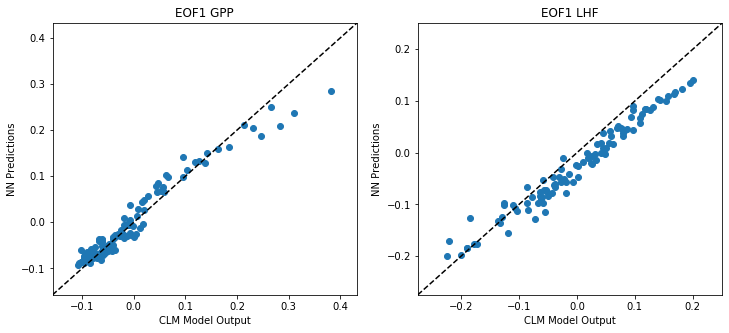

In [10]:
# scatterplot actual versus predicted
j=0 # mode 1
fig, axs = plt.subplots(1, nvar, figsize=(12,5))
axs = axs.ravel()

axs[0].scatter(outputdata_GPP[:,j], model_preds_GPP[:,j])
axs[0].set_xlabel('CLM Model Output')
axs[0].set_ylabel('NN Predictions')
axs[0].set_title("EOF"+str(j+1)+" GPP")
bounds = (np.amin([outputdata_GPP[:,j],model_preds_GPP[:,j]])-0.05,np.amax([outputdata_GPP[:,j],model_preds_GPP[:,j]])+0.05)
#print(bounds)
axs[0].plot([bounds[0], bounds[1]], [bounds[0], bounds[1]], 'k--', color = 'k')
axs[0].set_xlim(bounds)
axs[0].set_ylim(bounds)

axs[1].scatter(outputdata_LHF[:,j], model_preds_LHF[:,j])
axs[1].set_xlabel('CLM Model Output')
axs[1].set_ylabel('NN Predictions')
axs[1].set_title("EOF"+str(j+1)+" LHF")
bounds = (np.amin([outputdata_LHF[:,j],model_preds_LHF[:,j]])-0.05,np.amax([outputdata_LHF[:,j],model_preds_LHF[:,j]])+0.05)
axs[1].plot([bounds[0], bounds[1]], [bounds[0], bounds[1]], 'k--', color = 'k')
axs[1].set_xlim(bounds)
axs[1].set_ylim(bounds);

#plt.savefig("validation_scatter_EOF1_GPP_LHF.pdf")

In [11]:
slope, intercept, r_value, p_value, std_err = stats.linregress(outputdata_GPP[:,0],
        model_preds_GPP[:,0])
print("Mode 1 r-squared: %.2g" % r_value**2)

Mode 1 r-squared: 0.95


In [12]:
slope, intercept, r_value, p_value, std_err = stats.linregress(outputdata_LHF[:,0],
        model_preds_LHF[:,0])
print("Mode 1 r-squared: %.2g" % r_value**2)

Mode 1 r-squared: 0.96


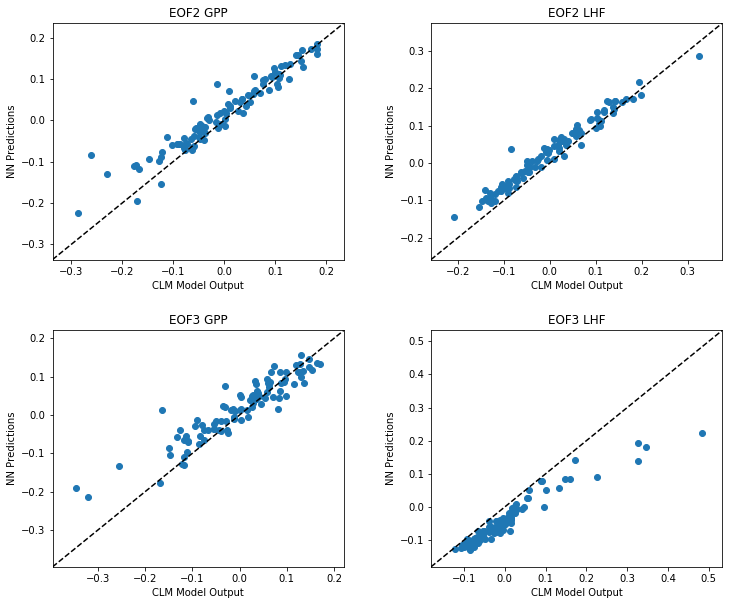

In [13]:
j=1 # mode 2
fig, axs = plt.subplots(2, nvar, figsize=(12,10))
axs = axs.ravel()

axs[0].scatter(outputdata_GPP[:,j], model_preds_GPP[:,j])
axs[0].set_xlabel('CLM Model Output')
axs[0].set_ylabel('NN Predictions')
axs[0].set_title("EOF"+str(j+1)+" GPP")
bounds = (np.amin([outputdata_GPP[:,j],model_preds_GPP[:,j]])-0.05,np.amax([outputdata_GPP[:,j],model_preds_GPP[:,j]])+0.05)
#print(bounds)
axs[0].plot([bounds[0], bounds[1]], [bounds[0], bounds[1]], 'k--', color = 'k')
axs[0].set_xlim(bounds)
axs[0].set_ylim(bounds)

axs[1].scatter(outputdata_LHF[:,j], model_preds_LHF[:,j])
axs[1].set_xlabel('CLM Model Output')
axs[1].set_ylabel('NN Predictions')
axs[1].set_title("EOF"+str(j+1)+" LHF")
bounds = (np.amin([outputdata_LHF[:,j],model_preds_LHF[:,j]])-0.05,np.amax([outputdata_LHF[:,j],model_preds_LHF[:,j]])+0.05)
axs[1].plot([bounds[0], bounds[1]], [bounds[0], bounds[1]], 'k--', color = 'k')
axs[1].set_xlim(bounds)
axs[1].set_ylim(bounds);

j=2 # mode 3
axs[2].scatter(outputdata_GPP[:,j], model_preds_GPP[:,j])
axs[2].set_xlabel('CLM Model Output')
axs[2].set_ylabel('NN Predictions')
axs[2].set_title("EOF"+str(j+1)+" GPP")
bounds = (np.amin([outputdata_GPP[:,j],model_preds_GPP[:,j]])-0.05,np.amax([outputdata_GPP[:,j],model_preds_GPP[:,j]])+0.05)
#print(bounds)
axs[2].plot([bounds[0], bounds[1]], [bounds[0], bounds[1]], 'k--', color = 'k')
axs[2].set_xlim(bounds)
axs[2].set_ylim(bounds)

axs[3].scatter(outputdata_LHF[:,j], model_preds_LHF[:,j])
axs[3].set_xlabel('CLM Model Output')
axs[3].set_ylabel('NN Predictions')
axs[3].set_title("EOF"+str(j+1)+" LHF")
bounds = (np.amin([outputdata_LHF[:,j],model_preds_LHF[:,j]])-0.05,np.amax([outputdata_LHF[:,j],model_preds_LHF[:,j]])+0.05)
axs[3].plot([bounds[0], bounds[1]], [bounds[0], bounds[1]], 'k--', color = 'k')
axs[3].set_xlim(bounds)
axs[3].set_ylim(bounds);

plt.subplots_adjust(hspace=0.3,wspace=0.3)
#plt.savefig("validation_scatter_EOF2-3_GPP_LHF.pdf")

All three modes on one plot

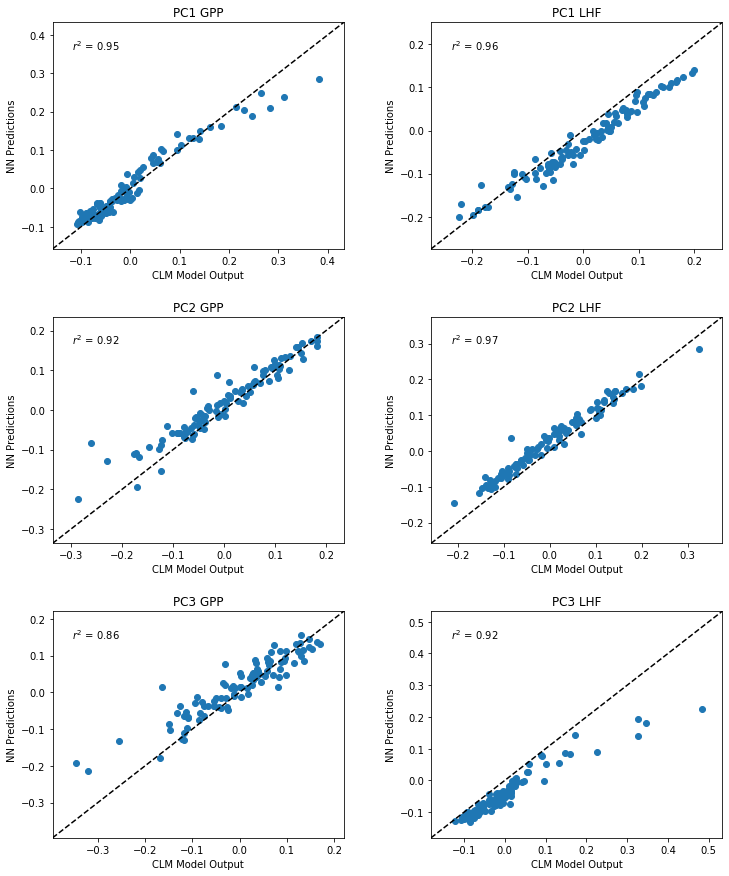

In [12]:
j=0 # mode 1
fig, axs = plt.subplots(3, nvar, figsize=(12,15))
axs = axs.ravel()

slope, intercept, r_value, p_value, std_err = stats.linregress(outputdata_GPP[:,j],
        model_preds_GPP[:,j])
pltstr = "$r^2$ = %.2g" % r_value**2
axs[0].scatter(outputdata_GPP[:,j], model_preds_GPP[:,j])
axs[0].text(0.15, 0.9, pltstr, horizontalalignment='center', verticalalignment='center', 
            transform=axs[0].transAxes)
axs[0].set_xlabel('CLM Model Output')
axs[0].set_ylabel('NN Predictions')
axs[0].set_title("PC"+str(j+1)+" GPP")
bounds = (np.amin([outputdata_GPP[:,j],model_preds_GPP[:,j]])-0.05,np.amax([outputdata_GPP[:,j],model_preds_GPP[:,j]])+0.05)
#print(bounds)
axs[0].plot([bounds[0], bounds[1]], [bounds[0], bounds[1]], 'k--', color = 'k')
axs[0].set_xlim(bounds)
axs[0].set_ylim(bounds)

slope, intercept, r_value, p_value, std_err = stats.linregress(outputdata_LHF[:,j],
        model_preds_LHF[:,j])
pltstr = "$r^2$ = %.2g" % r_value**2
axs[1].scatter(outputdata_LHF[:,j], model_preds_LHF[:,j])
axs[1].text(0.15, 0.9, pltstr, horizontalalignment='center', verticalalignment='center', 
            transform=axs[1].transAxes)
axs[1].set_xlabel('CLM Model Output')
axs[1].set_ylabel('NN Predictions')
axs[1].set_title("PC"+str(j+1)+" LHF")
bounds = (np.amin([outputdata_LHF[:,j],model_preds_LHF[:,j]])-0.05,np.amax([outputdata_LHF[:,j],model_preds_LHF[:,j]])+0.05)
axs[1].plot([bounds[0], bounds[1]], [bounds[0], bounds[1]], 'k--', color = 'k')
axs[1].set_xlim(bounds)
axs[1].set_ylim(bounds)

j=1 # mode 2
slope, intercept, r_value, p_value, std_err = stats.linregress(outputdata_GPP[:,j],
        model_preds_GPP[:,j])
pltstr = "$r^2$ = %.2g" % r_value**2
axs[2].scatter(outputdata_GPP[:,j], model_preds_GPP[:,j])
axs[2].text(0.15, 0.9, pltstr, horizontalalignment='center', verticalalignment='center', 
            transform=axs[2].transAxes)
axs[2].set_xlabel('CLM Model Output')
axs[2].set_ylabel('NN Predictions')
axs[2].set_title("PC"+str(j+1)+" GPP")
bounds = (np.amin([outputdata_GPP[:,j],model_preds_GPP[:,j]])-0.05,np.amax([outputdata_GPP[:,j],model_preds_GPP[:,j]])+0.05)
#print(bounds)
axs[2].plot([bounds[0], bounds[1]], [bounds[0], bounds[1]], 'k--', color = 'k')
axs[2].set_xlim(bounds)
axs[2].set_ylim(bounds)

slope, intercept, r_value, p_value, std_err = stats.linregress(outputdata_LHF[:,j],
        model_preds_LHF[:,j])
pltstr = "$r^2$ = %.2g" % r_value**2
axs[3].scatter(outputdata_LHF[:,j], model_preds_LHF[:,j])
axs[3].text(0.15, 0.9, pltstr, horizontalalignment='center', verticalalignment='center', 
            transform=axs[3].transAxes)
axs[3].set_xlabel('CLM Model Output')
axs[3].set_ylabel('NN Predictions')
axs[3].set_title("PC"+str(j+1)+" LHF")
bounds = (np.amin([outputdata_LHF[:,j],model_preds_LHF[:,j]])-0.05,np.amax([outputdata_LHF[:,j],model_preds_LHF[:,j]])+0.05)
axs[3].plot([bounds[0], bounds[1]], [bounds[0], bounds[1]], 'k--', color = 'k')
axs[3].set_xlim(bounds)
axs[3].set_ylim(bounds);

j=2 # mode 3
slope, intercept, r_value, p_value, std_err = stats.linregress(outputdata_GPP[:,j],
        model_preds_GPP[:,j])
pltstr = "$r^2$ = %.2g" % r_value**2
axs[4].scatter(outputdata_GPP[:,j], model_preds_GPP[:,j])
axs[4].text(0.15, 0.9, pltstr, horizontalalignment='center', verticalalignment='center', 
            transform=axs[4].transAxes)
axs[4].set_xlabel('CLM Model Output')
axs[4].set_ylabel('NN Predictions')
axs[4].set_title("PC"+str(j+1)+" GPP")
bounds = (np.amin([outputdata_GPP[:,j],model_preds_GPP[:,j]])-0.05,np.amax([outputdata_GPP[:,j],model_preds_GPP[:,j]])+0.05)
#print(bounds)
axs[4].plot([bounds[0], bounds[1]], [bounds[0], bounds[1]], 'k--', color = 'k')
axs[4].set_xlim(bounds)
axs[4].set_ylim(bounds)

slope, intercept, r_value, p_value, std_err = stats.linregress(outputdata_LHF[:,j],
        model_preds_LHF[:,j])
pltstr = "$r^2$ = %.2g" % r_value**2
axs[5].scatter(outputdata_LHF[:,j], model_preds_LHF[:,j])
axs[5].text(0.15, 0.9, pltstr, horizontalalignment='center', verticalalignment='center', 
            transform=axs[5].transAxes)
axs[5].set_xlabel('CLM Model Output')
axs[5].set_ylabel('NN Predictions')
axs[5].set_title("PC"+str(j+1)+" LHF")
bounds = (np.amin([outputdata_LHF[:,j],model_preds_LHF[:,j]])-0.05,np.amax([outputdata_LHF[:,j],model_preds_LHF[:,j]])+0.05)
axs[5].plot([bounds[0], bounds[1]], [bounds[0], bounds[1]], 'k--', color = 'k')
axs[5].set_xlim(bounds)
axs[5].set_ylim(bounds);

plt.subplots_adjust(hspace=0.3,wspace=0.3)
#plt.savefig("validation_scatter_EOF1-3_GPP_LHF_withr2.pdf")

Large out-of-sample test: a second PPE

In [14]:
inputdata_v2 = np.load(file="../lhc_100_v2.npy", allow_pickle=True)

In [15]:
outputdata_GPP_v2 = np.load(file="../outputdata/outputdata_GPP_SVD_3modes_v2.npy")
outputdata_LHF_v2 = np.load(file="../outputdata/outputdata_LHF_SVD_3modes_v2.npy")

In [16]:
model_preds_GPP_v2 = model_GPP.predict(inputdata_v2)
model_preds_LHF_v2 = model_LHF.predict(inputdata_v2)

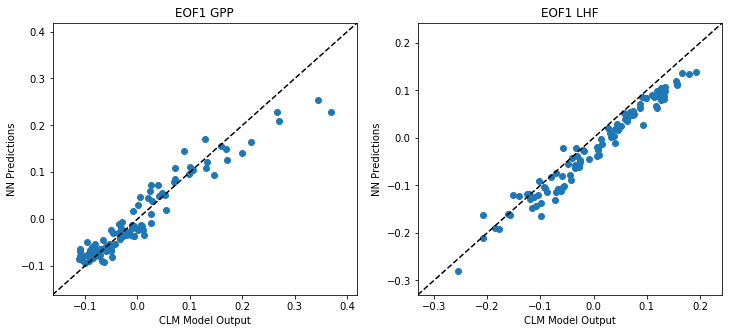

In [37]:
# scatterplot actual versus predicted
j=0 # mode 1
fig, axs = plt.subplots(1, nvar, figsize=(12,5))
axs = axs.ravel()

axs[0].scatter(outputdata_GPP_v2[:,j], model_preds_GPP_v2[:,j])
axs[0].set_xlabel('CLM Model Output')
axs[0].set_ylabel('NN Predictions')
axs[0].set_title("EOF"+str(j+1)+" GPP")
bounds = (np.amin([outputdata_GPP_v2[:,j],model_preds_GPP_v2[:,j]])-0.05,np.amax([outputdata_GPP_v2[:,j],model_preds_GPP_v2[:,j]])+0.05)
#print(bounds)
axs[0].plot([bounds[0], bounds[1]], [bounds[0], bounds[1]], 'k--', color = 'k')
axs[0].set_xlim(bounds)
axs[0].set_ylim(bounds)

axs[1].scatter(outputdata_LHF_v2[:,j], model_preds_LHF_v2[:,j])
axs[1].set_xlabel('CLM Model Output')
axs[1].set_ylabel('NN Predictions')
axs[1].set_title("EOF"+str(j+1)+" LHF")
bounds = (np.amin([outputdata_LHF_v2[:,j],model_preds_LHF_v2[:,j]])-0.05,np.amax([outputdata_LHF_v2[:,j],model_preds_LHF_v2[:,j]])+0.05)
axs[1].plot([bounds[0], bounds[1]], [bounds[0], bounds[1]], 'k--', color = 'k')
axs[1].set_xlim(bounds)
axs[1].set_ylim(bounds);

#plt.savefig("validation_scatter_EOF1_GPP_LHF_OOS.pdf")

In [38]:
slope, intercept, r_value, p_value, std_err = stats.linregress(outputdata_GPP_v2[:,0],
        model_preds_GPP_v2[:,0])
print("Mode 1 r-squared: %.2g" % r_value**2)

Mode 1 r-squared: 0.92


In [39]:
slope, intercept, r_value, p_value, std_err = stats.linregress(outputdata_LHF_v2[:,0],
        model_preds_LHF_v2[:,0])
print("Mode 1 r-squared: %.2g" % r_value**2)

Mode 1 r-squared: 0.96


All three modes on one plot

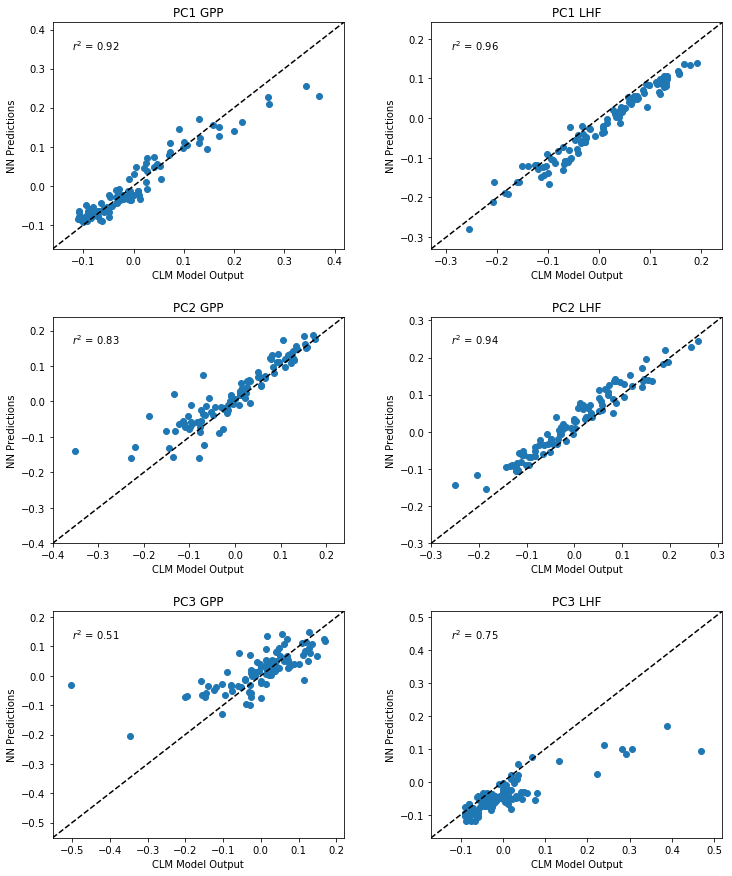

In [18]:
j=0 # mode 1
fig, axs = plt.subplots(3, nvar, figsize=(12,15))
axs = axs.ravel()

slope, intercept, r_value, p_value, std_err = stats.linregress(outputdata_GPP_v2[:,j],
        model_preds_GPP_v2[:,j])
pltstr = "$r^2$ = %.2g" % r_value**2
axs[0].scatter(outputdata_GPP_v2[:,j], model_preds_GPP_v2[:,j])
axs[0].text(0.15, 0.9, pltstr, horizontalalignment='center', verticalalignment='center', 
            transform=axs[0].transAxes)
axs[0].set_xlabel('CLM Model Output')
axs[0].set_ylabel('NN Predictions')
axs[0].set_title("PC"+str(j+1)+" GPP")
bounds = (np.amin([outputdata_GPP_v2[:,j],model_preds_GPP_v2[:,j]])-0.05,np.amax([outputdata_GPP_v2[:,j],model_preds_GPP_v2[:,j]])+0.05)
#print(bounds)
axs[0].plot([bounds[0], bounds[1]], [bounds[0], bounds[1]], 'k--', color = 'k')
axs[0].set_xlim(bounds)
axs[0].set_ylim(bounds)

slope, intercept, r_value, p_value, std_err = stats.linregress(outputdata_LHF_v2[:,j],
        model_preds_LHF_v2[:,j])
pltstr = "$r^2$ = %.2g" % r_value**2
axs[1].scatter(outputdata_LHF_v2[:,j], model_preds_LHF_v2[:,j])
axs[1].text(0.15, 0.9, pltstr, horizontalalignment='center', verticalalignment='center', 
            transform=axs[1].transAxes)
axs[1].set_xlabel('CLM Model Output')
axs[1].set_ylabel('NN Predictions')
axs[1].set_title("PC"+str(j+1)+" LHF")
bounds = (np.amin([outputdata_LHF_v2[:,j],model_preds_LHF_v2[:,j]])-0.05,np.amax([outputdata_LHF_v2[:,j],model_preds_LHF_v2[:,j]])+0.05)
axs[1].plot([bounds[0], bounds[1]], [bounds[0], bounds[1]], 'k--', color = 'k')
axs[1].set_xlim(bounds)
axs[1].set_ylim(bounds)

j=1 # mode 2
slope, intercept, r_value, p_value, std_err = stats.linregress(outputdata_GPP_v2[:,j],
        model_preds_GPP_v2[:,j])
pltstr = "$r^2$ = %.2g" % r_value**2
axs[2].scatter(outputdata_GPP_v2[:,j], model_preds_GPP_v2[:,j])
axs[2].text(0.15, 0.9, pltstr, horizontalalignment='center', verticalalignment='center', 
            transform=axs[2].transAxes)
axs[2].set_xlabel('CLM Model Output')
axs[2].set_ylabel('NN Predictions')
axs[2].set_title("PC"+str(j+1)+" GPP")
bounds = (np.amin([outputdata_GPP_v2[:,j],model_preds_GPP_v2[:,j]])-0.05,np.amax([outputdata_GPP_v2[:,j],model_preds_GPP_v2[:,j]])+0.05)
#print(bounds)
axs[2].plot([bounds[0], bounds[1]], [bounds[0], bounds[1]], 'k--', color = 'k')
axs[2].set_xlim(bounds)
axs[2].set_ylim(bounds)

slope, intercept, r_value, p_value, std_err = stats.linregress(outputdata_LHF_v2[:,j],
        model_preds_LHF_v2[:,j])
pltstr = "$r^2$ = %.2g" % r_value**2
axs[3].scatter(outputdata_LHF_v2[:,j], model_preds_LHF_v2[:,j])
axs[3].text(0.15, 0.9, pltstr, horizontalalignment='center', verticalalignment='center', 
            transform=axs[3].transAxes)
axs[3].set_xlabel('CLM Model Output')
axs[3].set_ylabel('NN Predictions')
axs[3].set_title("PC"+str(j+1)+" LHF")
bounds = (np.amin([outputdata_LHF_v2[:,j],model_preds_LHF_v2[:,j]])-0.05,np.amax([outputdata_LHF_v2[:,j],model_preds_LHF_v2[:,j]])+0.05)
axs[3].plot([bounds[0], bounds[1]], [bounds[0], bounds[1]], 'k--', color = 'k')
axs[3].set_xlim(bounds)
axs[3].set_ylim(bounds);

j=2 # mode 3
slope, intercept, r_value, p_value, std_err = stats.linregress(outputdata_GPP_v2[:,j],
        model_preds_GPP_v2[:,j])
pltstr = "$r^2$ = %.2g" % r_value**2
axs[4].scatter(outputdata_GPP_v2[:,j], model_preds_GPP_v2[:,j])
axs[4].text(0.15, 0.9, pltstr, horizontalalignment='center', verticalalignment='center', 
            transform=axs[4].transAxes)
axs[4].set_xlabel('CLM Model Output')
axs[4].set_ylabel('NN Predictions')
axs[4].set_title("PC"+str(j+1)+" GPP")
bounds = (np.amin([outputdata_GPP_v2[:,j],model_preds_GPP_v2[:,j]])-0.05,np.amax([outputdata_GPP_v2[:,j],model_preds_GPP_v2[:,j]])+0.05)
#print(bounds)
axs[4].plot([bounds[0], bounds[1]], [bounds[0], bounds[1]], 'k--', color = 'k')
axs[4].set_xlim(bounds)
axs[4].set_ylim(bounds)

slope, intercept, r_value, p_value, std_err = stats.linregress(outputdata_LHF_v2[:,j],
        model_preds_LHF_v2[:,j])
pltstr = "$r^2$ = %.2g" % r_value**2
axs[5].scatter(outputdata_LHF_v2[:,j], model_preds_LHF_v2[:,j])
axs[5].text(0.15, 0.9, pltstr, horizontalalignment='center', verticalalignment='center', 
            transform=axs[5].transAxes)
axs[5].set_xlabel('CLM Model Output')
axs[5].set_ylabel('NN Predictions')
axs[5].set_title("PC"+str(j+1)+" LHF")
bounds = (np.amin([outputdata_LHF_v2[:,j],model_preds_LHF_v2[:,j]])-0.05,np.amax([outputdata_LHF_v2[:,j],model_preds_LHF_v2[:,j]])+0.05)
axs[5].plot([bounds[0], bounds[1]], [bounds[0], bounds[1]], 'k--', color = 'k')
axs[5].set_xlim(bounds)
axs[5].set_ylim(bounds);

plt.subplots_adjust(hspace=0.3,wspace=0.3)
#plt.savefig("validation_scatter_EOF1-3_GPP_LHF_OOS_withr2.pdf")

## Emulation / Ensemble Inflation

In [19]:
# Predictions with inflated ensemble
inputdata_inflate = np.load(file="../lhc_1000.npy", allow_pickle=True)
model_preds_GPP_inflate = model_GPP.predict(inputdata_inflate)
model_preds_LHF_inflate = model_LHF.predict(inputdata_inflate)

Compare emulation with NN predictions of PPE

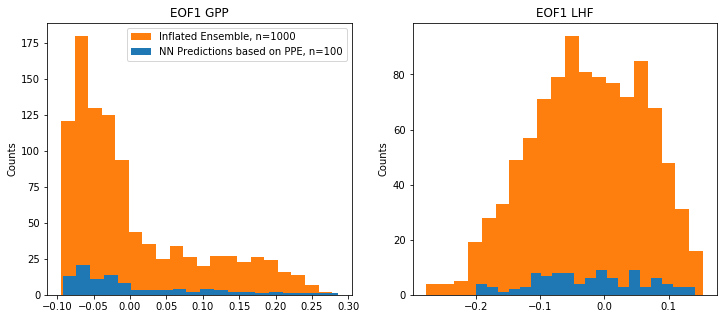

In [23]:
j=0 # mode 1
fig, axs = plt.subplots(1, nvar, figsize=(12,5))
axs = axs.ravel()

axs[0].hist(model_preds_GPP_inflate[:,j], bins=20, color='C1', label="Inflated Ensemble, n=1000")
axs[0].hist(model_preds_GPP[:,j], bins=20, color='C0', label="NN Predictions based on PPE, n=100")
axs[0].set_ylabel('Counts')
axs[0].set_title("EOF"+str(j+1)+" GPP")
axs[0].legend()

axs[1].hist(model_preds_LHF_inflate[:,j], bins=20, color='C1')
axs[1].hist(model_preds_LHF[:,j], bins=20, color='C0')
axs[1].set_ylabel('Counts')
axs[1].set_title("EOF"+str(j+1)+" LHF");

#plt.savefig("PPE_dists_EOF1_GPP_LHF_inflate1000.pdf")

Compare emulation with original PPE

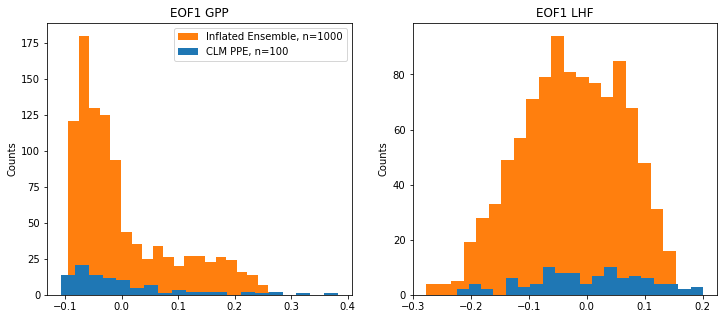

In [24]:
j=0 # mode 1
fig, axs = plt.subplots(1, nvar, figsize=(12,5))
axs = axs.ravel()

axs[0].hist(model_preds_GPP_inflate[:,j], bins=20, color='C1', label="Inflated Ensemble, n=1000")
axs[0].hist(outputdata_GPP[:,j], bins=20, color='C0', label="CLM PPE, n=100")
#axs[0].hist(model_preds_GPP[:,j], bins=20, color='C2', alpha=0.5, label="PPE Predictions, n=100")
axs[0].set_ylabel('Counts')
axs[0].set_title("EOF"+str(j+1)+" GPP")
axs[0].legend()

axs[1].hist(model_preds_LHF_inflate[:,j], bins=20, color='C1')
axs[1].hist(outputdata_LHF[:,j], bins=20, color='C0')
axs[1].set_ylabel('Counts')
axs[1].set_title("EOF"+str(j+1)+" LHF");

#plt.savefig("PPE_dists_EOF1_GPP_LHF_inflate1000.pdf")

All three modes on one plot

In [20]:
PPE_modes = [np.load("../outputdata/outputdata_"+v+"_SVD_3modes.npy") for v in var]

In [21]:
PPE_inflate = [model_preds_GPP_inflate, model_preds_LHF_inflate]

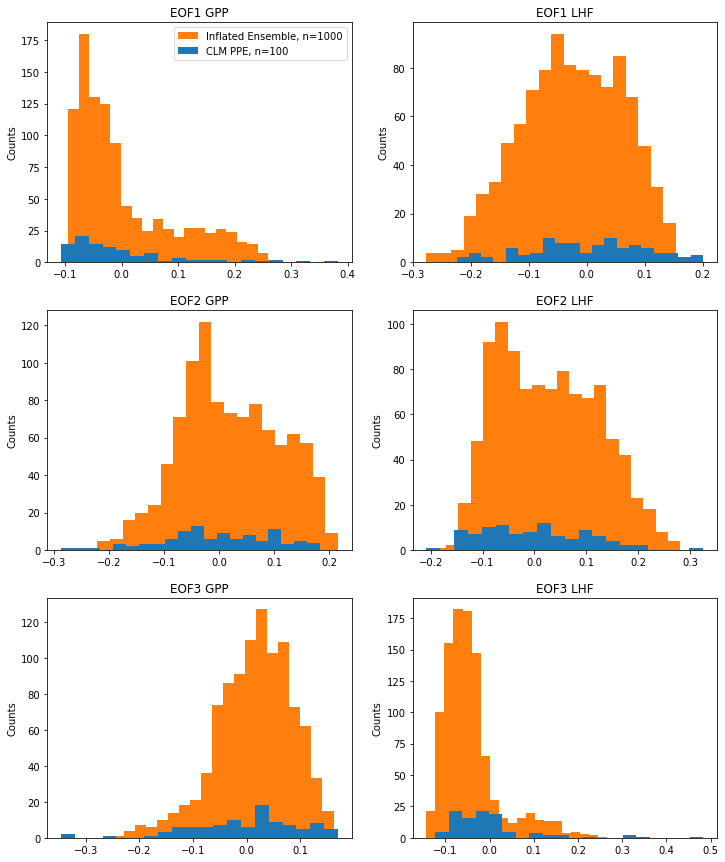

In [22]:
nmodes = PPE_modes[0].shape[1]
fig,axs = plt.subplots(nmodes, nvar, figsize=(6*nvar,5*nmodes))

for j in range(nmodes):
    for i in range(nvar):
        axs[j,i].hist(PPE_inflate[i][:,j], bins=20, color='C1', label="Inflated Ensemble, n=1000")
        axs[j,i].hist(PPE_modes[i][:,j], bins=20, color='C0', label="CLM PPE, n=100")
        axs[j,i].set_ylabel('Counts')
        axs[j,i].set_title("EOF"+str(j+1)+" "+var[i])
        if i==0 and j==0:
            axs[j,i].legend()
            
#plt.savefig("PPE_dists_EOF1-3_GPP_LHF_inflate1000.pdf")

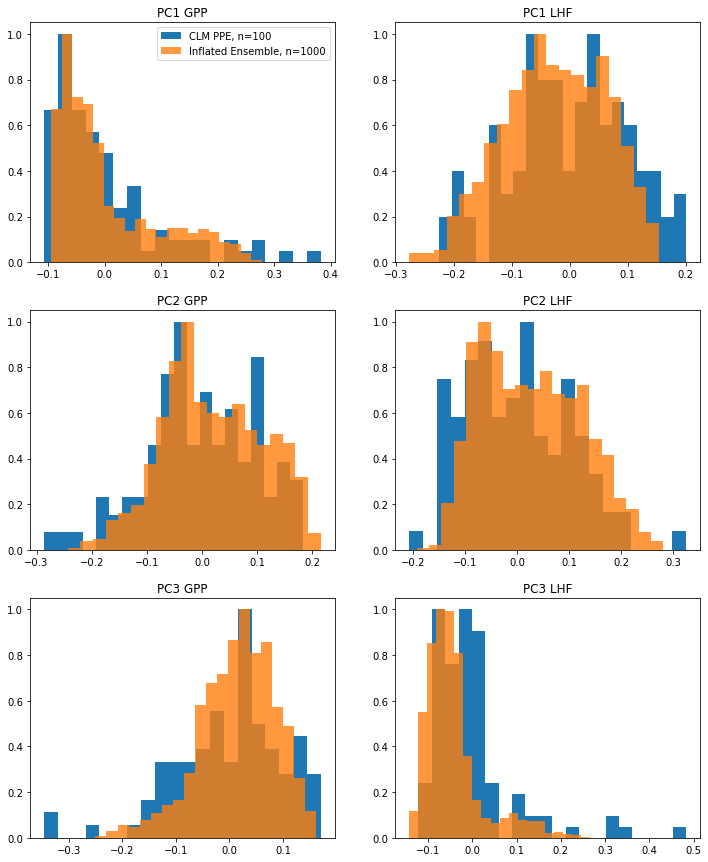

In [60]:
# normalized plot
nmodes = PPE_modes[0].shape[1]
fig,axs = plt.subplots(nmodes, nvar, figsize=(6*nvar,5*nmodes))

for j in range(nmodes):
    for i in range(nvar):
        hist1, bins1 = np.histogram(PPE_modes[i][:,j], bins=20)
        bin1_centers = 0.5*(bins1[:-1]+bins1[1:])
        bin1_widths = bins1[1:]-bins1[:-1]
        hist2, bins2 = np.histogram(PPE_inflate[i][:,j], bins=20)
        bin2_centers = 0.5*(bins2[:-1]+bins2[1:])
        bin2_widths = bins2[1:]-bins2[:-1]
        
        # normalizing
        hist1b = hist1/np.max(hist1)
        hist2b = hist2/np.max(hist2)

        axs[j,i].bar(bin1_centers, hist1b, width=bin1_widths, align='center', color='C0', label="CLM PPE, n=100")
        axs[j,i].bar(bin2_centers, hist2b, width=bin2_widths, align='center', color='C1', label="Inflated Ensemble, n=1000", alpha=0.8)
        #axs[j,i].set_ylabel('Counts')
        axs[j,i].set_title("PC"+str(j+1)+" "+var[i])
        if i==0 and j==0:
            axs[j,i].legend()
            
#plt.savefig("PPE_dists_EOF1-3_GPP_LHF_inflate1000_normalized.pdf")

## Observations

In [10]:
Fobs = [np.load("../obs/obs_"+v+"_SVD_3modes.npy") for v in var]

In [11]:
default_modes = [np.load("../outputdata/modeldefault_"+v+"_SVD_3modes.npy") for v in var]

In [12]:
# Read in the PPE modes again in a more organized way
PPE_modes = [np.load("../outputdata/outputdata_"+v+"_SVD_3modes.npy") for v in var]
nmodes = PPE_modes[0].shape[1]
PPE_modes_mean = np.mean(PPE_modes, axis=1)

In [13]:
# Read in NN models in a more organized way
NN_models = [load_model("../emulators/NN_"+v+"_finalize_multi-dim.h5", 
    custom_objects={'mean_sq_err' :mean_sq_err}) for v in var]

In [14]:
# Model predictions in a more organized way
PPE_preds = [NN_models[i].predict(inputdata) for i,v in enumerate(var)]

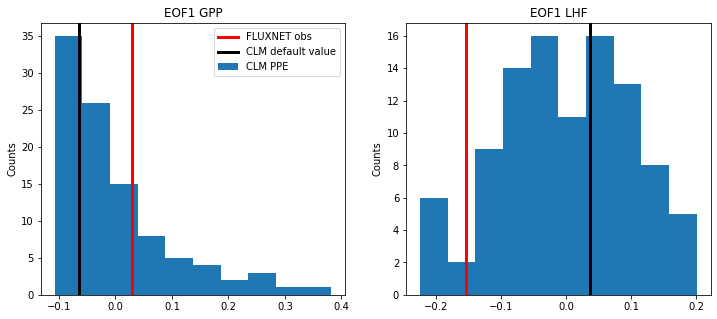

In [15]:
i=0 # first mode
fig, axs = plt.subplots(1, nvar, figsize=(12, 5))
axs = axs.ravel()

for j in range(nvar):
    axs[i+j].hist(PPE_modes[j][:,i], bins=10, label="CLM PPE")
    axs[i+j].set_title("EOF"+str(i+1)+" "+var[j])
    axs[i+j].axvline(x=Fobs[j][:,i], color='r', linewidth=3, label="FLUXNET obs")
    axs[i+j].axvline(x=default_modes[j][:,i], color='k', linewidth=3, label="CLM default value")
    axs[i+j].set_ylabel("Counts");
    if j==0:
        axs[0].legend()
            
#plt.savefig("PPE_dists_obs_EOF1_GPP_LHF.pdf")

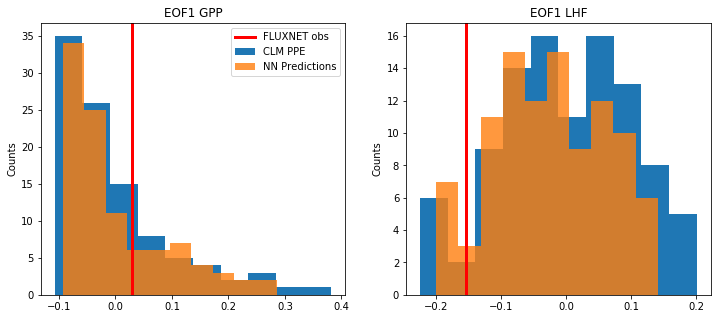

In [51]:
i=0 # first mode
fig, axs = plt.subplots(1, nvar, figsize=(12, 5))
axs = axs.ravel()

for j in range(nvar):
    axs[i+j].hist(PPE_modes[j][:,i], bins=10, label="CLM PPE")
    axs[i+j].hist(PPE_preds[j][:,i], bins=10, alpha=0.8, label="NN Predictions")
    axs[i+j].set_title("EOF"+str(i+1)+" "+var[j])
    axs[i+j].axvline(x=Fobs[j][:,i], color='r', linewidth=3, label="FLUXNET obs")
    axs[i+j].set_ylabel("Counts");
    if j==0:
        axs[0].legend()
            
#plt.savefig("PPE_NN_dists_obs_EOF1_GPP_LHF.pdf")

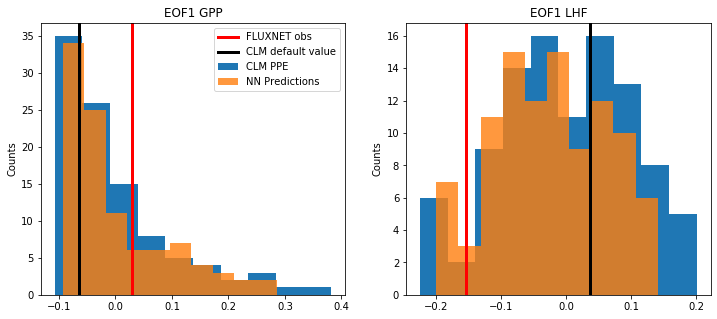

In [36]:
i=0 # first mode
fig, axs = plt.subplots(1, nvar, figsize=(12, 5))
axs = axs.ravel()

for j in range(nvar):
    axs[i+j].hist(PPE_modes[j][:,i], bins=10, label="CLM PPE")
    axs[i+j].hist(PPE_preds[j][:,i], bins=10, alpha=0.8, label="NN Predictions")
    axs[i+j].set_title("EOF"+str(i+1)+" "+var[j])
    axs[i+j].axvline(x=Fobs[j][:,i], color='r', linewidth=3, label="FLUXNET obs")
    #axs[i+j].axvline(x=Wobs[j][:,i], color='c', linestyle='dashed', linewidth=2, label="WECANN")
    axs[i+j].axvline(x=default_modes[j][:,i], color='k', linewidth=3, label="CLM default value")
    #axs[i+j].axvline(x=PPE_modes_mean[j,i], color='g', linestyle='dashed', linewidth=2, label="PPE mean")
    axs[i+j].set_ylabel("Counts");
    if j==0:
        axs[0].legend()
            
#plt.savefig("PPE_NN_dists_obs_default_EOF1_GPP_LHF.pdf")

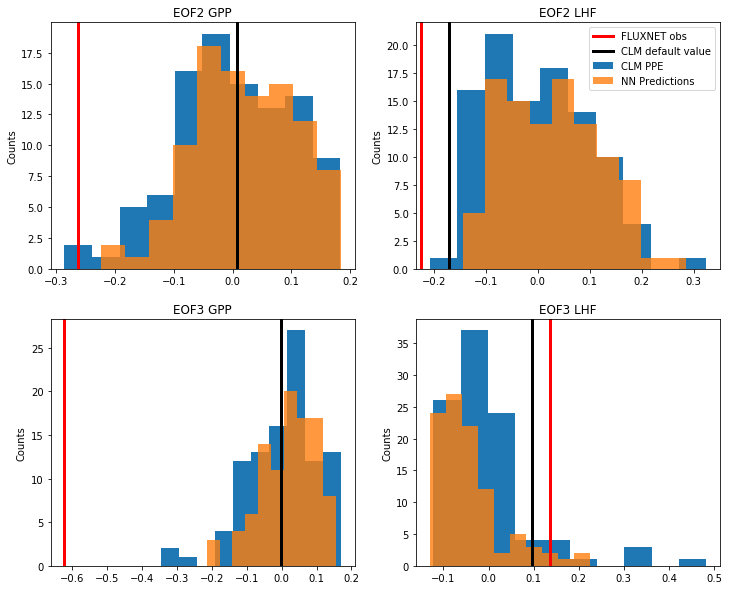

In [40]:
nmodes=2 # second/third modes
fig, axs = plt.subplots(nmodes, nvar, figsize=(12, 10))
#axs = axs.ravel()

for j in range(nvar):
    for i in 1,2:        
        axs[i-1,j].hist(PPE_modes[j][:,i], bins=10, label="CLM PPE")
        axs[i-1,j].hist(PPE_preds[j][:,i], bins=10, alpha=0.8, label="NN Predictions")
        axs[i-1,j].set_title("EOF"+str(i+1)+" "+var[j])
        axs[i-1,j].axvline(x=Fobs[j][:,i], color='r', linewidth=3, label="FLUXNET obs")
        axs[i-1,j].axvline(x=default_modes[j][:,i], color='k', linewidth=3, label="CLM default value")
        axs[i-1,j].set_ylabel("Counts");
        if j==1 and i==1:
            axs[i-1,j].legend()
            
#plt.savefig("PPE_NN_dists_obs_default_EOF2-3_GPP_LHF.pdf")

All three modes on one plot

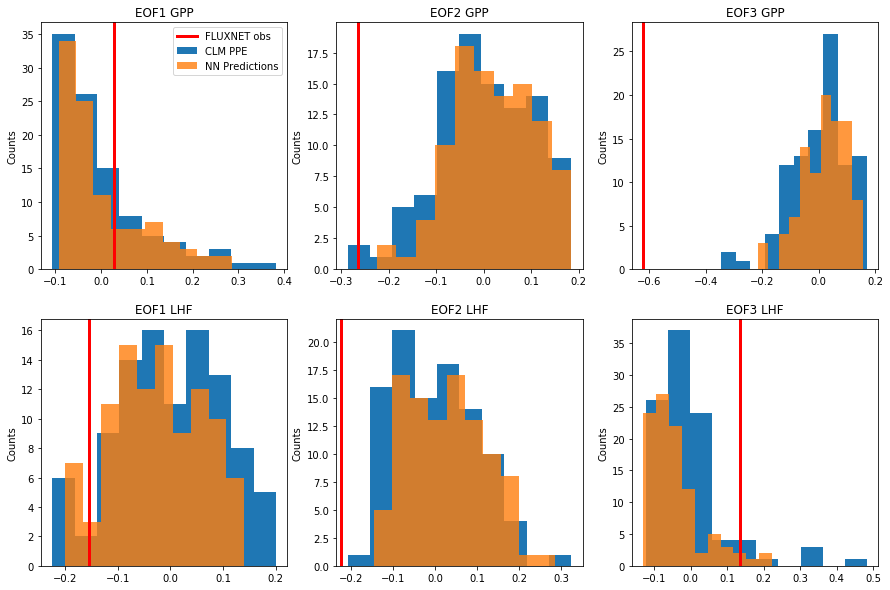

In [46]:
nmodes=3 # second/third modes
fig, axs = plt.subplots(nvar, nmodes, figsize=(15, 10))
#axs = axs.ravel()

for j in range(nvar):
    for i in range(nmodes):        
        axs[j,i].hist(PPE_modes[j][:,i], bins=10, label="CLM PPE")
        axs[j,i].hist(PPE_preds[j][:,i], bins=10, alpha=0.8, label="NN Predictions")
        axs[j,i].set_title("EOF"+str(i+1)+" "+var[j])
        axs[j,i].axvline(x=Fobs[j][:,i], color='r', linewidth=3, label="FLUXNET obs")
        #axs[j,i].axvline(x=default_modes[j][:,i], color='k', linewidth=3, label="CLM default value")
        axs[j,i].set_ylabel("Counts");
        if j==0 and i==0:
            axs[j,i].legend()
            
#plt.savefig("PPE_NN_dists_obs_EOF1-3_GPP_LHF.pdf")

Use the obs standard deviation (calculated from all obs years) to visualize some obs uncertainty bounds

In [17]:
obs_sd = [np.load("../obs/obs_"+v+"_SVD_3modes_allyrs_sd.npy") for v in var]

In [18]:
obs_sd

[array([0.00325403, 0.01975097, 0.02706034], dtype=float32),
 array([0.00742627, 0.01579977, 0.02434924], dtype=float32)]

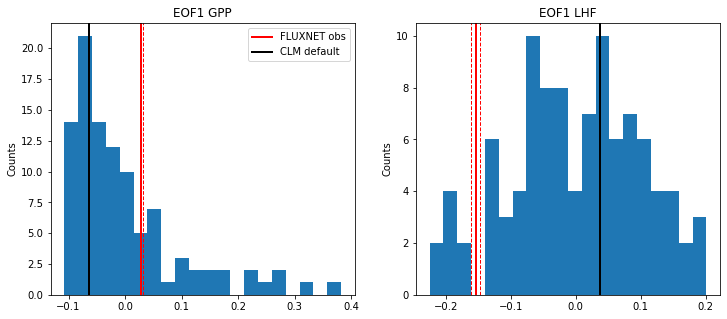

In [19]:
i=0 # first mode
fig, axs = plt.subplots(1, nvar, figsize=(12, 5))
axs = axs.ravel()

for j in range(nvar):
    axs[i+j].hist(PPE_modes[j][:,i], bins=20)
    axs[i+j].set_title("EOF"+str(i+1)+" "+var[j])
    axs[i+j].axvline(x=Fobs[j][:,i], color='r', linewidth=2, label="FLUXNET obs")
    axs[i+j].axvline(x=Fobs[j][:,i]+obs_sd[j][i], color='r', linestyle='dashed', linewidth=1)
    axs[i+j].axvline(x=Fobs[j][:,i]-obs_sd[j][i], color='r', linestyle='dashed', linewidth=1)
    axs[i+j].axvline(x=default_modes[j][:,i], color='k', linewidth=2, label="CLM default")
    axs[i+j].set_ylabel("Counts");
    if j==0:
        axs[0].legend()

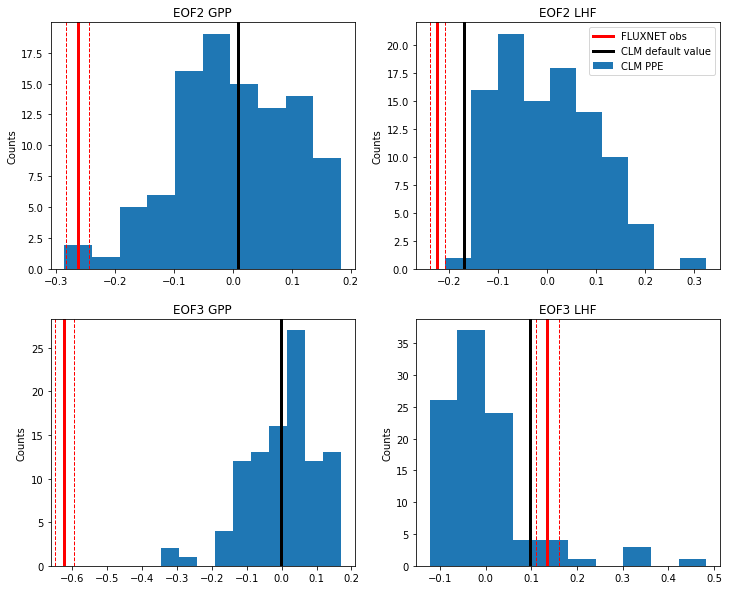

In [75]:
nmodes=2 # second/third modes
fig, axs = plt.subplots(nmodes, nvar, figsize=(12, 10))
#axs = axs.ravel()

for j in range(nvar):
    for i in 1,2:        
        axs[i-1,j].hist(PPE_modes[j][:,i], bins=10, label="CLM PPE")
        #axs[i-1,j].hist(PPE_preds[j][:,i], bins=10, alpha=0.8, label="NN Predictions")
        axs[i-1,j].set_title("EOF"+str(i+1)+" "+var[j])
        axs[i-1,j].axvline(x=Fobs[j][:,i], color='r', linewidth=3, label="FLUXNET obs")
        axs[i-1,j].axvline(x=Fobs[j][:,i]+obs_sd[j][i], color='r', linestyle='dashed', linewidth=1)
        axs[i-1,j].axvline(x=Fobs[j][:,i]-obs_sd[j][i], color='r', linestyle='dashed', linewidth=1)
        axs[i-1,j].axvline(x=default_modes[j][:,i], color='k', linewidth=3, label="CLM default value")
        axs[i-1,j].set_ylabel("Counts");
        if j==1 and i==1:
            axs[i-1,j].legend()
            

## Optimization

Bring in the optimized predictions and CLM test case

In [38]:
# Results from NN_opt_plot.ipynb
# Differential Evolution with mode weighting in cost function
#opt_params_preserved = [5.35314627e-01, 9.98124407e-01, 3.08100513e-01, 1.05168812e-04, 9.98661100e-01, 2.25861839e-04]
#opt_preds_preserved = [[ 0.03000795, -0.04406739, -0.04776282], [-0.14517023, -0.14306705,  0.090743  ]]

In [20]:
# Dual Annealing without mode weighting
opt_preds_preserved = [[0.02890645, -0.06951523, -0.08969758], [-0.1181925 , -0.10534558,  0.12309852]]

In [39]:
# Alter opt results for purpose of visualizing (EOF1 GPP overlaps)
opt_preds_preserved_mod = opt_preds_preserved
opt_preds_preserved_mod[0][0] = opt_preds_preserved_mod[0][0]+0.0015

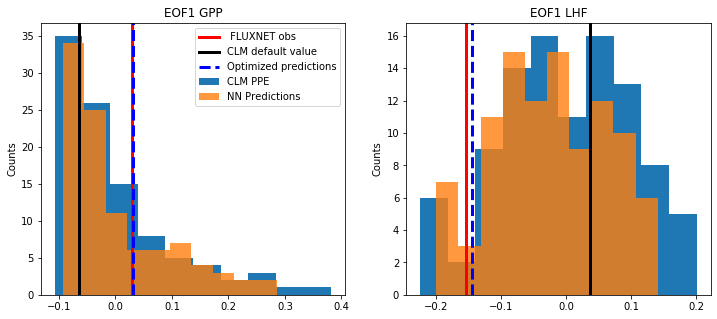

In [49]:
# First mode only
fig, axs = plt.subplots(1, nvar, figsize=(12, 5))
axs = axs.ravel()
i=0
for j in range(nvar):
    axs[j].hist(PPE_modes[j][:,i], bins=10, label="CLM PPE")
    axs[j].hist(PPE_preds[j][:,i], bins=10, alpha=0.8, label="NN Predictions")
    axs[j].set_title("EOF"+str(i+1)+" "+var[j])
    axs[j].axvline(x=Fobs[j][:,i], color='r', linewidth=3, label=" FLUXNET obs")
    axs[j].axvline(x=default_modes[j][:,i], color='k', linewidth=3, label="CLM default value")
    axs[j].axvline(x=opt_preds_preserved[j][i], color='b', linestyle='dashed', linewidth=3, label="Optimized predictions")
    #axs[j].scatter(x=opt_preds_preserved[j][i], y=0, color='b', zorder=10) # try adding a point
    axs[j].set_ylabel("Counts")
    if j == 0:
        ax.Axes.legend(self=axs[j]);
            
#plt.savefig("PPE_NN_dists_obs_default_opt_EOF1_GPP_LHF.pdf")

## Include results of CLM test case (run with optimized parameter values)

In [21]:
# test case results recorded in Sensitivity spreadsheet, taken from SVD.py
#test_modes = [[0.03052036, -0.3424246, -0.30153644], [-0.11895278, -0.25456372, 0.4816724]] # test_paramset_SVD_v4
test_modes = [[0.02649317, -0.34624937, -0.31480002], [-0.11090902, -0.2392534, 0.49658725]] # test_paramset_SVD_v5

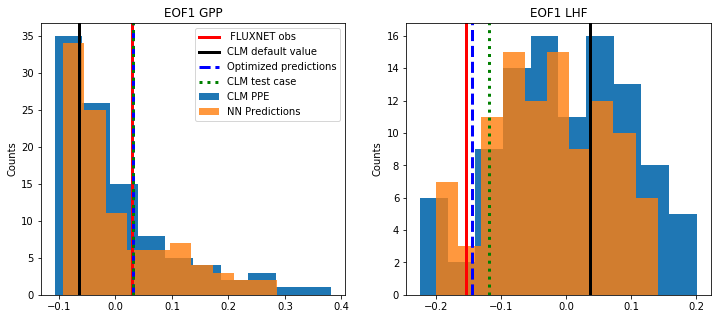

In [45]:
# First mode only
fig, axs = plt.subplots(1, nvar, figsize=(12, 5))
axs = axs.ravel()
i=0
for j in range(nvar):
    axs[j].hist(PPE_modes[j][:,i], bins=10, label="CLM PPE")
    axs[j].hist(PPE_preds[j][:,i], bins=10, alpha=0.8, label="NN Predictions")
    axs[j].set_title("EOF"+str(i+1)+" "+var[j])
    axs[j].axvline(x=Fobs[j][:,i], color='r', linewidth=3, label=" FLUXNET obs")
    axs[j].axvline(x=default_modes[j][:,i], color='k', linewidth=3, label="CLM default value")
    axs[j].axvline(x=opt_preds_preserved_mod[j][i], color='b', linestyle='dashed', linewidth=3, label="Optimized predictions")
    axs[j].axvline(x=test_modes[j][i], color='g', linestyle='dotted', linewidth=3, label="CLM test case")
    axs[j].set_ylabel("Counts")
    if j == 0:
        ax.Axes.legend(self=axs[j]);
            
#plt.savefig("PPE_NN_dists_obs_default_opt_test_EOF1_GPP_LHF.pdf")

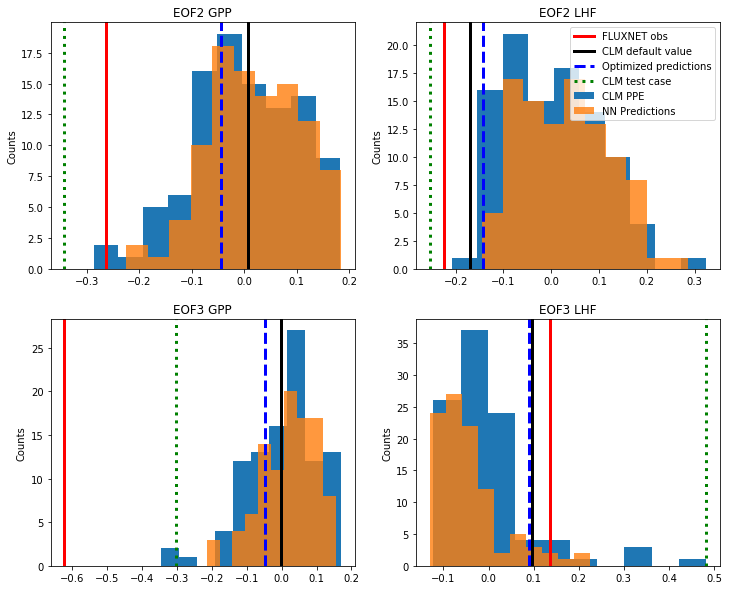

In [114]:
nmodes=2 # second/third modes
fig, axs = plt.subplots(nmodes, nvar, figsize=(12, 10))
#axs = axs.ravel()

for j in range(nvar):
    for i in 1,2:        
        axs[i-1,j].hist(PPE_modes[j][:,i], bins=10, label="CLM PPE")
        axs[i-1,j].hist(PPE_preds[j][:,i], bins=10, alpha=0.8, label="NN Predictions")
        axs[i-1,j].set_title("EOF"+str(i+1)+" "+var[j])
        axs[i-1,j].axvline(x=Fobs[j][:,i], color='r', linewidth=3, label="FLUXNET obs")
        axs[i-1,j].axvline(x=default_modes[j][:,i], color='k', linewidth=3, label="CLM default value")
        axs[i-1,j].axvline(x=opt_preds_preserved_mod[j][i], color='b', linestyle='dashed', linewidth=3, label="Optimized predictions")
        axs[i-1,j].axvline(x=test_modes[j][i], color='g', linestyle='dotted', linewidth=3, label="CLM test case")
        axs[i-1,j].set_ylabel("Counts");
        if j==1 and i==1:
            axs[i-1,j].legend()
            
#plt.savefig("PPE_NN_dists_obs_default_opt_test_EOF2-3_GPP_LHF.pdf")

All three modes on one plot

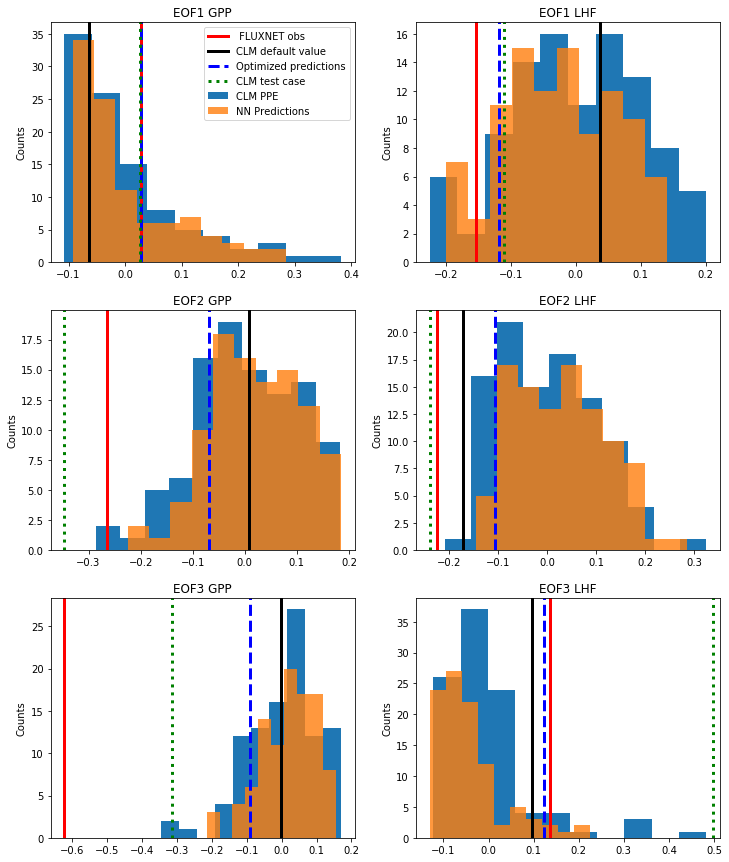

In [23]:
nmodes = 3
fig, axs = plt.subplots(nmodes, nvar, figsize=(6*nvar, 5*nmodes))
for j in range(nvar):
    for i in range(nmodes):
        axs[i,j].hist(PPE_modes[j][:,i], bins=10, label="CLM PPE")
        axs[i,j].hist(PPE_preds[j][:,i], bins=10, alpha=0.8, label="NN Predictions")
        axs[i,j].set_title("EOF"+str(i+1)+" "+var[j])
        axs[i,j].axvline(x=Fobs[j][:,i], color='r', linewidth=3, label=" FLUXNET obs")
        axs[i,j].axvline(x=default_modes[j][:,i], color='k', linewidth=3, label="CLM default value")
        axs[i,j].axvline(x=opt_preds_preserved[j][i], color='b', linestyle='dashed', linewidth=3, label="Optimized predictions")
        #axs[i,j].axvline(x=opt_preds_preserved_mod[j][i], color='b', linestyle='dashed', linewidth=3, label="Optimized predictions")
        axs[i,j].axvline(x=test_modes[j][i], color='g', linestyle='dotted', linewidth=3, label="CLM test case")
        axs[i,j].set_ylabel("Counts")
        if j == 0 and i == 0:
            ax.Axes.legend(self=axs[i,j]);
            
#plt.savefig("PPE_NN_dists_obs_default_opt_test_EOF1-3_GPP_LHF.pdf")
#plt.savefig("PPE_NN_dists_obs_default_opt_testv5_EOF1-3_GPP_LHF.pdf")